In [479]:
import os

# Cambiar al directorio correcto
os.chdir('/Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/00_SEMESTRE/Diseño producto de datos/git')

In [480]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Configurar gráficos en línea
%matplotlib inline

# Cargar los archivos CSV
transactions = pd.read_csv('data/data_BOC_transactions.csv')
credit_risk = pd.read_csv('data/data_BOC_creditRisk.csv')
fraud_detection = pd.read_csv('data/data_BOC_fraudDetection.csv')


## Analisis exploratorio, limpieza y preprocesamiento de Datos

### Analisis exploratorio - data_BOC_transactions.csv

In [481]:
# Mostrar las primeras filas de cada dataframe
transactions.head()

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),otherActor
0,T1,C5841053,10/1/94,F,Viana do Castelo,2/8/16,25.0,C1419665
1,T2,C2142763,4/4/57,M,Coria del Río,2/8/16,27999.0,NaN
2,T3,C4417068,26/11/96,F,Jávea,2/8/16,459.0,C3467392
3,T4,C5342380,14/9/73,F,Córdoba,2/8/16,2060.0,C6628470
4,T5,C9031234,24/3/88,F,Sestao,2/8/16,1762.5,C7321714


In [482]:
print("Información General de Transacciones:\n")
print(transactions.info())

Información General de Transacciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerBirth            1045170 non-null  object 
 3   CustomerGender           1047467 non-null  object 
 4   TransactionLocation      1048567 non-null  object 
 5   TransactionDate          1048567 non-null  object 
 6   TransactionAmount (eur)  1048567 non-null  float64
 7   otherActor               419567 non-null   object 
dtypes: float64(1), object(7)
memory usage: 64.0+ MB
None


In [483]:
# TransactionAmount (eur)
transactions.describe()

,TransactionAmount (eur)
count,1.048567e+06
mean,3.103965e+02
std,6.753476e+03
min,-1.560035e+06
25%,-2.700000e+02
50%,1.000000e+02
75%,6.000000e+02
max,6.000083e+05


In [484]:
# Verificar valores nulos
print("Valores Nulos en Transacciones % :")
print(transactions.isnull().mean() * 100)

Valores Nulos en Transacciones % :
TransactionID               0.000000
CustomerID                  0.000000
CustomerBirth               0.323966
CustomerGender              0.104905
TransactionLocation         0.000000
TransactionDate             0.000000
TransactionAmount (eur)     0.000000
otherActor                 59.986629
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Transacciones (data_BOC_transactions.csv):</strong>   
Total de registros: 1,048,567  , <strong>CustomerBirth</strong>: 0´34% nulos  , <strong>CustomerGender</strong>: 0´1% nulos  , <strong>otherActor</strong>: 60% nulos  

La gran cantidad de valores nulos en otherActor sugiere que muchas transacciones son unilaterales o que no se registró correctamente el otro actor involucrado. Los valores nulos en CustomerBirth y CustomerGender necesitarán imputación o eliminación, dependiendo de su relevancia para el análisis de riesgo crediticio.

* otherActor:  hay una cantidad significativa de transacciones sin un actor contrario (otherActor).
* CustomerBirth y `CustomerGender: Algunas transacciones carecen de información sobre la fecha de nacimiento y el género del cliente, pero estos valores nulos son relativamente pequeños en comparación con el total de registros.
* TransactionAmount (eur): Los valores varían ampliamente, indicando una diversidad en el tamaño de las transacciones.

### Analisis exploratorio - data_BOC_creditRisk.csv

In [485]:
# Riesgo de Crédito
credit_risk.head()

,Job,Housing,Credit amount,Duration,Purpose,Risk,CustomerID
0,2,own,1169,6,radio/TV,good,C1938652
1,2,own,5951,48,radio/TV,bad,C8016323
2,1,own,2096,12,education,good,C5141487
3,2,free,7882,42,furniture/equipment,good,C7035854
4,2,free,4870,24,car,bad,C5442952


In [486]:
print("Información General de Riesgo de Crédito:\n")
print(credit_risk.info())

Información General de Riesgo de Crédito:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job            1000 non-null   int64 
 1   Housing        1000 non-null   object
 2   Credit amount  1000 non-null   int64 
 3   Duration       1000 non-null   int64 
 4   Purpose        1000 non-null   object
 5   Risk           1000 non-null   object
 6   CustomerID     1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB
None


In [487]:
credit_risk.describe()

,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,1.904000,3271.258000,20.903000
std,0.653614,2822.736876,12.058814
min,0.000000,250.000000,4.000000
25%,2.000000,1365.500000,12.000000
50%,2.000000,2319.500000,18.000000
75%,2.000000,3972.250000,24.000000
max,3.000000,18424.000000,72.000000


In [488]:
# Verificar valores nulos
print("\nValores Nulos en Riesgo de Crédito % :")
print(credit_risk.isnull().mean() * 100)


Valores Nulos en Riesgo de Crédito % :
Job              0.0
Housing          0.0
Credit amount    0.0
Duration         0.0
Purpose          0.0
Risk             0.0
CustomerID       0.0
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Riesgo de Crédito (data_BOC_creditRisk.csv):</strong>  
Total de registros: 1,000 . No hay valores nulos. 

Los datos están equilibrados en términos de características y pueden proporcionar un buen punto de partida para entrenar un modelo predictivo de riesgo de crédito. Listo para ser utilizado en el modelado sin necesidad de limpieza adicional. 

* Job, Housing, Credit amount, Duration, Purpose, Risk: Estos campos están bien definidos y completos. 
* Risk: La variable de riesgo contiene las etiquetas good y bad, que son cruciales para el modelo de evaluación de crédito.

In [489]:
df_fraud_detection = fraud_detection.copy()

### Analisis exploratorio - data_BOC_fraudDetection.csv

In [490]:
# Detección de Fraude
df_fraud_detection.head()

,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C4241584,170136.0,160296.36,C7814776,0.0,0.0,0
1,PAYMENT,1864.28,C7332525,21249.0,19384.72,C7821866,0.0,0.0,0
2,TRANSFER,181.00,NaN,181.0,0.00,C5821867,0.0,0.0,1
3,CASH_OUT,181.00,C8442079,181.0,0.00,C8831669,21182.0,0.0,1
4,PAYMENT,11668.14,C3359562,41554.0,29885.86,NaN,0.0,0.0,0


In [491]:
print("Información General de Detección de Fraude:\ ")
fraud_detection.info()

Información General de Detección de Fraude:\ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            100000 non-null  object 
 1   amount          100000 non-null  float64
 2   Orig            75000 non-null   object 
 3   oldbalanceOrig  100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   Dest            75000 non-null   object 
 6   oldbalanceDest  100000 non-null  float64
 7   newbalanceDest  100000 non-null  float64
 8   isFraud         100000 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 6.9+ MB


In [492]:
fraud_detection.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160
std,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039
min,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000
75%,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000
max,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000


In [493]:
# Verificar valores nulos
print("\nValores Nulos en Detección de Fraude % :")
print(fraud_detection.isnull().mean() * 100)


Valores Nulos en Detección de Fraude % :
type               0.0
amount             0.0
Orig              25.0
oldbalanceOrig     0.0
newbalanceOrig     0.0
Dest              25.0
oldbalanceDest     0.0
newbalanceDest     0.0
isFraud            0.0
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Detección de Fraude (data_BOC_fraudDetection.csv):</strong>  
Total de registros: 100,000  , <strong>Orig</strong>: 25% nulos  , <strong>Dest</strong>: 25% nulos  

Los valores nulos en Orig y Dest indican que una cantidad significativa de transacciones no tiene identificadores claros de origen y destino, lo que puede complicar el análisis de fraude. La baja incidencia de fraude **isFraud** requiere técnicas específicas para manejar el desbalanceo de clases en el modelo de detección de fraude.

* Orig y Dest: Una cuarta parte de los registros carecen de información sobre el origen y destino de las transacciones, lo cual es significativo.
* isFraud: Contiene etiquetas binarias indicando si una transacción es fraudulenta o no, con una incidencia muy baja de fraude (0.116% de las transacciones).



### Limpieza y preprocesamiento de datos

* **Eliminación de Duplicados**: Identificar y eliminar registros duplicados.
* **Manejo de Valores Faltantes**: Imputación o eliminación de valores nulos o faltantes.
* **Conversión de Tipos de Datos**: Asegurar que los tipos de datos sean consistentes para análisis y modelado.
* **Normalización y Estandarización**: Escalado de variables numéricas para su uso en modelos.


In [712]:
# Cargar los archivos CSV
df_fraud_detection = fraud_detection.copy()
df_transactions = transactions.copy()
df_credit_risk = credit_risk.copy()

Datos duplicados

In [713]:
# Verificar si hay instancias duplicadas
duplicated_rows = df_transactions.duplicated()
print("Número de filas duplicadas en df_transactions:", duplicated_rows.sum())

# Verificar si hay instancias duplicadas
duplicated_rows = df_credit_risk.duplicated()
print("Número de filas duplicadas en df_duplicated_rows:", duplicated_rows.sum())

# Verificar si hay instancias duplicadas
duplicated_rows = df_fraud_detection.duplicated()
print("Número de filas duplicadas en df_fraud_detection:", duplicated_rows.sum())

Número de filas duplicadas en df_transactions: 0
Número de filas duplicadas en df_duplicated_rows: 0
Número de filas duplicadas en df_fraud_detection: 0





#### df_transactions
---

>
> <br>
> Variables Explicativas (Features)
>
>* **TransactionAmount (eur)**: Monto de la transacción.
>* **TransactionLocation**: Localización de la transacción.
>* **CustomerGender**: Género del cliente.
>* **CustomerBirth**: Fecha de nacimiento del cliente.
>* **TransactionDate**: Fecha de la transacción.
>
>
>Variables Objetivo (Targets)
>
>
>* **TransactionAmount (eur)**: Puede ser utilizada tanto como feature en análisis predictivo o target en análisis de series temporales para pronosticar transacciones futuras.
>
> <br>
---

**df_transactions['CustomerGender']**

In [714]:
print(df_transactions['CustomerGender'].unique())

['F' 'M' nan 'T']


In [715]:
df_transactions['CustomerGender'].value_counts(dropna=False)


CustomerGender
M      765530
F      281936
NaN      1100
T           1
Name: count, dtype: int64

In [716]:
# Eliminar la fila con 'T' en 'CustomerGender'
df_transactions = df_transactions[df_transactions['CustomerGender'] != 'T']

# valores nulos en CustomerGender
df_transactions['CustomerGender'] = df_transactions['CustomerGender'].dropna()

# Verificar la imputación
print(f"Valores nulos en 'CustomerGender' : {df_transactions['CustomerGender'].isnull().sum()} \n")
print(df_transactions['CustomerGender'].unique())

Valores nulos en 'CustomerGender' : 1100 

['F' 'M' nan]


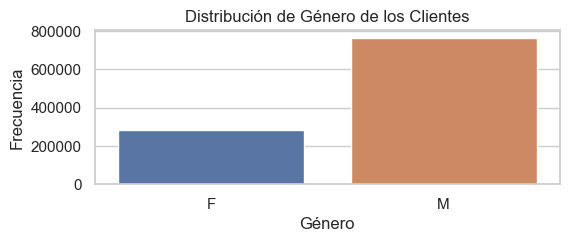

In [717]:
# Análisis de CustomerGender
plt.figure(figsize=(6, 2))
sns.countplot(data=df_transactions, x='CustomerGender')
plt.title('Distribución de Género de los Clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

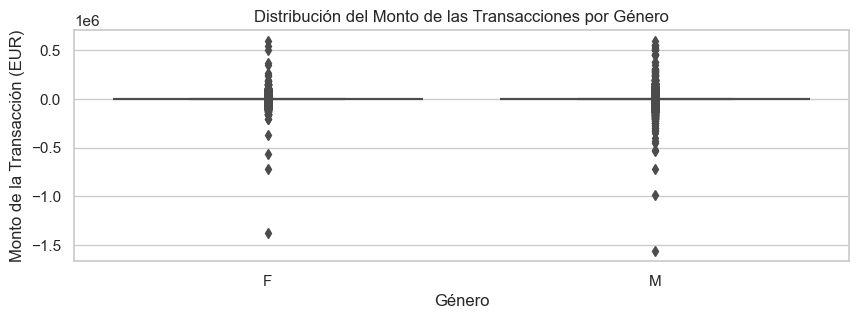

In [718]:

# Distribución del monto de las transacciones por género
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_transactions['CustomerGender'], y='TransactionAmount (eur)', data=transactions)
plt.title('Distribución del Monto de las Transacciones por Género')
plt.xlabel('Género')
plt.ylabel('Monto de la Transacción (EUR)')
plt.show()

In [719]:
# Ahora realizamos la codificación One-Hot
df_transactions_encoded = pd.get_dummies(df_transactions, columns=['CustomerGender'])
df_transactions_encoded.head()

,TransactionID,CustomerID,CustomerBirth,TransactionLocation,TransactionDate,TransactionAmount (eur),otherActor,CustomerGender_F,CustomerGender_M
0,T1,C5841053,10/1/94,Viana do Castelo,2/8/16,25.0,C1419665,True,False
1,T2,C2142763,4/4/57,Coria del Río,2/8/16,27999.0,NaN,False,True
2,T3,C4417068,26/11/96,Jávea,2/8/16,459.0,C3467392,True,False
3,T4,C5342380,14/9/73,Córdoba,2/8/16,2060.0,C6628470,True,False
4,T5,C9031234,24/3/88,Sestao,2/8/16,1762.5,C7321714,True,False


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**df_transactions['CustomerGender']**

* La codificación One-Hot convierte la columna CustomerGender en varias columnas binarias, permitiendo que los modelos de machine learning utilicen estas categorías sin suponer una relación ordinal entre ellas. Este paso es esencial para preparar adecuadamente los datos categóricos antes de entrenar un modelo de machine learning.
  
* En las 1048567 instancias tenemos un caso con el atributo "**T**" que no proporciona información suficiente y no es significativa, eliminamos la fila.

* Para los valores **nan**, creo una nueva categoría "Desconocido", esto evita hacer suposiciones y mantiene la integridad de los datos originales.  

---

**df_transactions['otherActor']**

En este caso, a falta de tener acceso a la funte de los datos, vamos a interpretar 'otherActor' como el ID de otra persona o entidad que participa en la transacción, como un vendedor, un beneficiario o un socio comercial.

In [720]:
non_null_other_actor = df_transactions['otherActor'].notnull().sum()
total_entries = df_transactions.shape[0]
print(f"Total entries: {total_entries}")
print(f"Entries with non-null otherActor: {non_null_other_actor}")

unique_other_actors = df_transactions['otherActor'].nunique()
print(f"Unique values in otherActor: {unique_other_actors}")

Total entries: 1048566
Entries with non-null otherActor: 419566
Unique values in otherActor: 390996


---

**En caso del emisor y receptor en df_transactions['TransactionAmount (eur)'] :**

Podemos apreciar que existen transacciones positivas y negativas (emitidas y recibidas), es decir, pagos e ingresos en cuenta. Por otra parte tenemos el CustomerID de la cuenta y tenemos el 'otherActor' que lo interpretamos como la otra entidad que participa en la transacción, es decir el receptor o emisor dependiendo si la transacción es + ó (-).

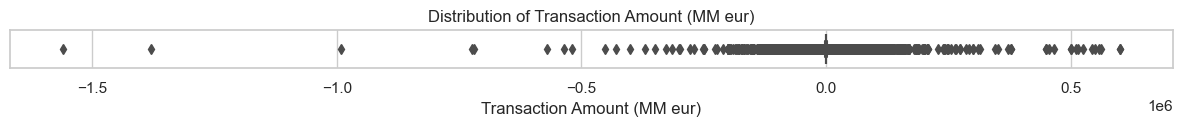

In [721]:
# Crear el boxplot horizontal
plt.figure(figsize=(15, 0.5))
sns.boxplot(x='TransactionAmount (eur)', data=df_transactions, orient='h')

# Etiquetas y título del gráfico
plt.xlabel('Transaction Amount (MM eur)')
plt.title('Distribution of Transaction Amount (MM eur)')
plt.show()

In [722]:
# Usando IQR para detectar y eliminar outliers
Q1 = df_transactions['TransactionAmount (eur)'].quantile(0.25)
Q3 = df_transactions['TransactionAmount (eur)'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_transactions = df_transactions[(df_transactions['TransactionAmount (eur)'] >= lower_bound) & 
                                  (df_transactions['TransactionAmount (eur)'] <= upper_bound)]

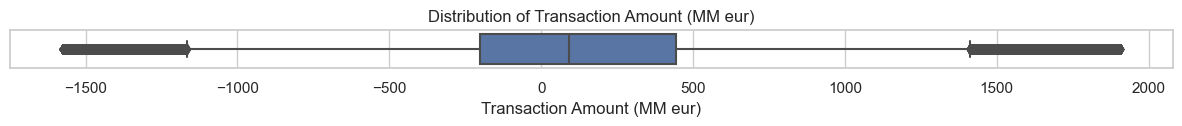

In [723]:
# Crear el boxplot horizontal
plt.figure(figsize=(15, 0.5))
sns.boxplot(x='TransactionAmount (eur)', data=df_transactions, orient='h')

# Etiquetas y título del gráfico
plt.xlabel('Transaction Amount (MM eur)')
plt.title('Distribution of Transaction Amount (MM eur)')
plt.show()

Vamos a transformar el dataset para separar claramente el EmitterID (ID del emisor) y ReceiverID (ID del receptor), de esta forma se hace más fácil realizar análisis y modelos predictivos sin tener que reinterpretar continuamente el significado de TransactionAmount (eur).

In [724]:
# Crear nuevas columnas EmitterID y ReceiverID basadas en el valor de TransactionAmount (eur)
df_transactions['EmitterID'] = df_transactions.apply(lambda row: row['CustomerID'] if row['TransactionAmount (eur)'] < 0 else row['otherActor'], axis=1)
df_transactions['ReceiverID'] = df_transactions.apply(lambda row: row['CustomerID'] if row['TransactionAmount (eur)'] > 0 else row['otherActor'], axis=1)

# Eliminar la columna 'otherActor' ya que no es necesaria
df_transactions.drop(['otherActor'], axis=1, inplace=True)

# Crear nueva categoría "Unknown" para los valores nulos en EmitterID y ReceiverID
df_transactions['EmitterID'] = df_transactions['EmitterID'].fillna('Unknown')
df_transactions['ReceiverID'] = df_transactions['ReceiverID'].fillna('Unknown')

# Verificación
df_transactions.head()


,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),EmitterID,ReceiverID
0,T1,C5841053,10/1/94,F,Viana do Castelo,2/8/16,25.0,C1419665,C5841053
2,T3,C4417068,26/11/96,F,Jávea,2/8/16,459.0,C3467392,C4417068
4,T5,C9031234,24/3/88,F,Sestao,2/8/16,1762.5,C7321714,C9031234
5,T6,C1536588,8/10/72,F,Teruel,2/8/16,676.0,Unknown,C1536588
6,T7,C7126560,26/1/92,F,Nancy,2/8/16,566.0,Unknown,C7126560


In [725]:
# Convertir la columna CustomerBirth a datetime
df_transactions['CustomerBirth'] = pd.to_datetime(df_transactions['CustomerBirth'], format='%d/%m/%y', errors='coerce')

# Definir la fecha de la transacción como una fecha de referencia para el cálculo de la edad
reference_date = pd.to_datetime('2024-06-26')

# Calcular la edad
df_transactions['CustomerAge'] = df_transactions['CustomerBirth'].apply(
    lambda x: reference_date.year - x.year - ((reference_date.month, reference_date.day) < (x.month, x.day)) if pd.notnull(x) else None
    )

df_transactions.head()


,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),EmitterID,ReceiverID,CustomerAge
0,T1,C5841053,1994-01-10,F,Viana do Castelo,2/8/16,25.0,C1419665,C5841053,30.0
2,T3,C4417068,1996-11-26,F,Jávea,2/8/16,459.0,C3467392,C4417068,27.0
4,T5,C9031234,1988-03-24,F,Sestao,2/8/16,1762.5,C7321714,C9031234,36.0
5,T6,C1536588,1972-10-08,F,Teruel,2/8/16,676.0,Unknown,C1536588,51.0
6,T7,C7126560,1992-01-26,F,Nancy,2/8/16,566.0,Unknown,C7126560,32.0


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**df_transactions['otherActor']**  
**df_transactions['TransactionAmount (eur)']**  
**df_transactions['CustomerAge']**


* Se crea nueva columna con la edad
  
* Hemos creado las nuevas columnas y ahora puedes ver que el emisor 'EmitterID' para transacciones (-) es el 'CustomerID' y el receptor 'ReceiverID' para transacciones positivas es el CustomerID. Y eliminamos **'otherActor'**.

* este cambio está relacionado con la interpretacion de 'otherActor'.

---

**'TransactionDate' & 'CustomerBirth' y el día 1/1/1800**

Los valores "1/1/1800" parecen ser un marcador de fecha por defecto que se utilizó en lugar de valores reales y no tienen relevancia real para el análisis. También existen fechas posteriores al día de hoy que no tiene sentido. Se devería convertir fechas a formato válido, además de manejar las fechas "1/1/1800" y futuras como nulos.

In [726]:
from datetime import datetime

In [727]:
# Verificar el número de nulos antes de la conversión
null_before_conversion = transactions['CustomerBirth'].isnull().sum()

# Convertir CustomerBirth a datetime con formato específico
date_format = '%d/%m/%y'  # Ajusta este formato de fecha si es necesario
df_transactions['CustomerBirth'] = pd.to_datetime(df_transactions['CustomerBirth'], format=date_format, errors='coerce')

# Verificar el número de nulos después de la conversión
null_after_conversion = df_transactions['CustomerBirth'].isnull().sum()

# Mostrar la diferencia
print(f"Número de valores nulos antes de la conversión: {null_before_conversion}")
print(f"Número de valores nulos después de la conversión: {null_after_conversion}")

# Examinar algunos valores originales que se convirtieron en nulos
invalid_dates = transactions.loc[pd.to_datetime(transactions['CustomerBirth'], format=date_format, errors='coerce').isnull(), 'CustomerBirth'].head(12)
print("Algunos de los valores originales que causaron nulos:")
print(invalid_dates)

Número de valores nulos antes de la conversión: 3397
Número de valores nulos después de la conversión: 39860
Algunos de los valores originales que causaron nulos:
16     1/1/1800
22     1/1/1800
28     1/1/1800
35     1/1/1800
151    1/1/1800
163    1/1/1800
176    1/1/1800
182    1/1/1800
190    1/1/1800
193    1/1/1800
206    1/1/1800
222         NaN
Name: CustomerBirth, dtype: object


Número de personas con una fecha de nacimiento superior a hoy: 36507
Número de valores nulos después del ajuste: 76367
Suma esperada de valores nulos: 76367


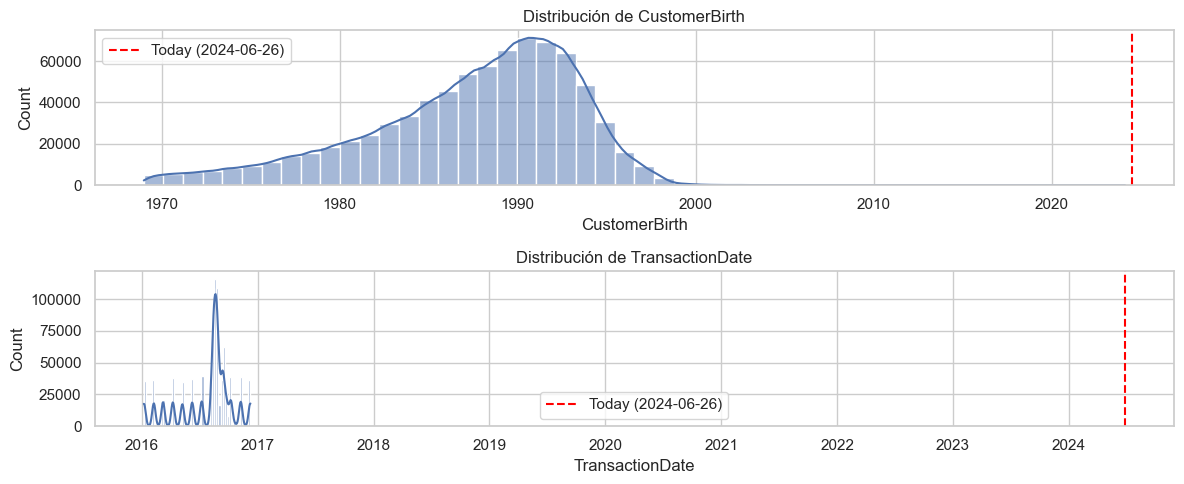

In [728]:
# Configurar la fecha de hoy
today = pd.Timestamp(datetime.now().date())

# Verificar cuántas fechas son superiores a hoy
num_invalid_birthdates = df_transactions['CustomerBirth'][df_transactions['CustomerBirth'] > today].count()
print(f"Número de personas con una fecha de nacimiento superior a hoy: {num_invalid_birthdates}")

# Convertir las fechas mayores a hoy en NaN
df_transactions.loc[df_transactions['CustomerBirth'] > today, 'CustomerBirth'] = pd.NaT

# Verificar el número de nulos después del ajuste
null_after_adjustment = df_transactions['CustomerBirth'].isnull().sum()
print(f"Número de valores nulos después del ajuste: {null_after_adjustment}")

# Validar suma esperada de nulos
expected_nulls = null_after_conversion + num_invalid_birthdates
print(f"Suma esperada de valores nulos: {expected_nulls}")

# Asegurarse de que TransactionDate también es del tipo datetime
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'], errors='coerce')

# Crear gráficos para la visualización
fig, axs = plt.subplots(2, 1, figsize=(12, 5))

# Histograma y KDE para CustomerBirth
sns.histplot(df_transactions['CustomerBirth'].dropna(), kde=True, ax=axs[0], bins=50)
axs[0].axvline(today, color='red', linestyle='--', label=f'Today ({today.date()})')
axs[0].set_title('Distribución de CustomerBirth')
axs[0].set_xlabel('CustomerBirth')
axs[0].set_ylabel('Count')
axs[0].legend()

# Histograma y KDE para TransactionDate
sns.histplot(df_transactions['TransactionDate'].dropna(), kde=True, ax=axs[1], bins=50)
axs[1].axvline(today, color='red', linestyle='--', label=f'Today ({today.date()})')
axs[1].set_title('Distribución de TransactionDate')
axs[1].set_xlabel('TransactionDate')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()

In [729]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para CustomerGender y TransactionLocation
contingency_table = pd.crosstab(transactions['CustomerGender'], transactions['TransactionLocation'])

# Chi-cuadrado de independencia
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")


Chi-cuadrado: 767.0344221749217, p-valor: 0.3067053573553715


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* Habían algunos valores en la columna CustomerBirth que eran **1/1/1800** o **nan**, y estos valores están siendo convertidos a NaT (Not a Time) cuando se convierte la columna a tipo datetime. Esto ha causado que más valores se conviertan en nulos después de la conversión.

* Hemos imputado fechas futuras al día de hoy que no tiene sentido para estos datos; para manejar las fechas erróneas sin afectar los cálculos o análisis posteriores, una estrategia es dejar las fechas erróneas como valores nulos (NaN), esto permite que las herramientas de análisis y machine learning manejen estas entradas de manera adecuada. Además podemos ver que las fechas de las transacciones se reducen al año 2016.

* El valor del chi-cuadrado y el p-valor obtenido indican que no hay una relación estadísticamente significativa entre las variables **CustomerGender y TransactionLocation** al nivel de significancia común (e.g., $\alpha$ = 0.05). Esto significa que, en este caso, la distribución de las transacciones por ubicación no parece depender del género del cliente.

In [730]:
df_transactions.head()

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),EmitterID,ReceiverID,CustomerAge
0,T1,C5841053,1994-01-10,F,Viana do Castelo,2016-02-08,25.0,C1419665,C5841053,30.0
2,T3,C4417068,1996-11-26,F,Jávea,2016-02-08,459.0,C3467392,C4417068,27.0
4,T5,C9031234,1988-03-24,F,Sestao,2016-02-08,1762.5,C7321714,C9031234,36.0
5,T6,C1536588,1972-10-08,F,Teruel,2016-02-08,676.0,Unknown,C1536588,51.0
6,T7,C7126560,1992-01-26,F,Nancy,2016-02-08,566.0,Unknown,C7126560,32.0


Guardo los DataFrames en archivos CSV

In [731]:
# eliminamos instancias nulas en nacimiento
df_transactions = df_transactions.dropna()
df_transactions.head()

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),EmitterID,ReceiverID,CustomerAge
0,T1,C5841053,1994-01-10,F,Viana do Castelo,2016-02-08,25.0,C1419665,C5841053,30.0
2,T3,C4417068,1996-11-26,F,Jávea,2016-02-08,459.0,C3467392,C4417068,27.0
4,T5,C9031234,1988-03-24,F,Sestao,2016-02-08,1762.5,C7321714,C9031234,36.0
5,T6,C1536588,1972-10-08,F,Teruel,2016-02-08,676.0,Unknown,C1536588,51.0
6,T7,C7126560,1992-01-26,F,Nancy,2016-02-08,566.0,Unknown,C7126560,32.0


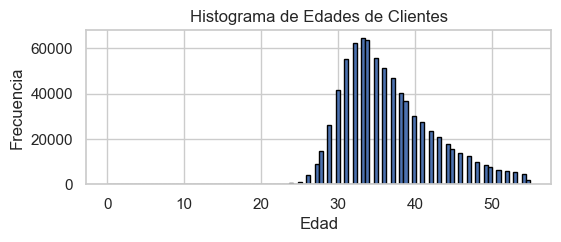

In [732]:
# Crear el histograma
plt.figure(figsize=(6, 2))
plt.hist(df_transactions['CustomerAge'], bins=100, edgecolor='black')
plt.title('Histograma de Edades de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [733]:
# Guardar los DataFrames en archivos CSV sin perder los índices 
df_transactions.to_csv('data/clean/df_transactions.csv', index=True)
print("df_transactions.csv guardadado correctamente")

df_transactions_ = pd.read_csv('data/clean/df_transactions.csv', index_col=0)
print("df_transactions_.csv cargado correctamente")

df_transactions.csv guardadado correctamente
df_transactions_.csv cargado correctamente


In [734]:
print(df_transactions.shape)
df_transactions_.head(10)

(786212, 10)


,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),EmitterID,ReceiverID,CustomerAge
0,T1,C5841053,1994-01-10,F,Viana do Castelo,2016-02-08,25.00,C1419665,C5841053,30.0
2,T3,C4417068,1996-11-26,F,Jávea,2016-02-08,459.00,C3467392,C4417068,27.0
4,T5,C9031234,1988-03-24,F,Sestao,2016-02-08,1762.50,C7321714,C9031234,36.0
5,T6,C1536588,1972-10-08,F,Teruel,2016-02-08,676.00,Unknown,C1536588,51.0
6,T7,C7126560,1992-01-26,F,Nancy,2016-02-08,566.00,Unknown,C7126560,32.0
7,T8,C1220223,1982-01-27,M,Manresa,2016-02-08,-148.00,C1220223,Unknown,42.0
8,T9,C8536061,1988-04-19,F,Torre-Pacheco,2016-02-08,-833.00,C8536061,C4539467,36.0
9,T10,C6638934,1984-06-22,M,Santa Eulalia del Río,2016-02-08,-289.11,C6638934,C1228424,40.0
10,T11,C5430833,1982-07-22,M,Campello,2016-02-08,259.00,C5425691,C5430833,41.0
11,T12,C6939838,1988-07-07,M,Burriana,2016-02-08,202.00,Unknown,C6939838,35.0


### df_fraud_detection
---

>  
> <br>
> 
>**Variables Explicativas (Features)**
>
>Fraud Detection:
>
>* **amount**: Monto de la transacción.
>* **oldbalanceOrig**: Saldo original antes de la transacción.
>* **newbalanceOrig**: Saldo nuevo después de la transacción.
>* **oldbalanceDest**: Saldo original del destinatario antes de la transacción.
>* **newbalanceDest**: Saldo nuevo del destinatario después de la transacción.
>* **type**: Tipo de transacción (PAYMENT, TRANSFER, CASH_OUT).
>
>**Variables Objetivo (Targets)**
>
>Fraud Detection:
>
>* **isFraud**: Indicador si la transacción es fraudulenta o no.
>  
> <br>  
> 

---

In [735]:
# Cargar los archivos CSV
df_fraud_detection = fraud_detection.copy()

SyntaxError: invalid syntax (2571137164.py, line 2)

In [ ]:
df_fraud_detection.head()

,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C4241584,170136.0,160296.36,C7814776,0.0,0.0,0
1,PAYMENT,1864.28,C7332525,21249.0,19384.72,C7821866,0.0,0.0,0
2,TRANSFER,181.00,NaN,181.0,0.00,C5821867,0.0,0.0,1
3,CASH_OUT,181.00,C8442079,181.0,0.00,C8831669,21182.0,0.0,1
4,PAYMENT,11668.14,C3359562,41554.0,29885.86,NaN,0.0,0.0,0


**df_fraud_detection['isFraud']**

In [ ]:
df_fraud_detection['isFraud'].value_counts(dropna=False)

isFraud
0    99884
1      116
Name: count, dtype: int64

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**df_fraud_detection['isFraud']**

Dado que la variable objetivo isFraud está altamente desbalanceada, esto puede presentar un desafío significativo para entrenar un modelo de machine learning efectivo. En situaciones como esta, se pueden utilizar varias técnicas para manejar el desbalanceo y mejorar el rendimiento del modelo.

* **Submuestreo de la Clase Mayoritaria**: Reducir el número de ejemplos de la clase mayoritaria (no fraudulenta) para que coincida más estrechamente con la clase minoritaria (fraudulenta).
* **Sobremuestreo de la Clase Minoritaria**: Aumentar el número de ejemplos de la clase minoritaria mediante técnicas como el duplicado de ejemplos o la creación de ejemplos sintéticos utilizando el método SMOTE (Synthetic Minority Over-sampling Technique).
* **Generar Nuevas Características**: Crear nuevas características que puedan ayudar a distinguir mejor entre las transacciones fraudulentas y no fraudulentas.
* **Utilizar Algoritmos Sensibles al Desbalanceo**: Utilizar algoritmos que sean robustos frente al desbalanceo de clases, como los árboles de decisión o Random Forest con ponderación de clases.
* **Ensamblado de Modelos (Ensembling)**: Combinar varios modelos para mejorar la capacidad del modelo final para identificar transacciones fraudulentas.

**df_fraud_detection['type']**

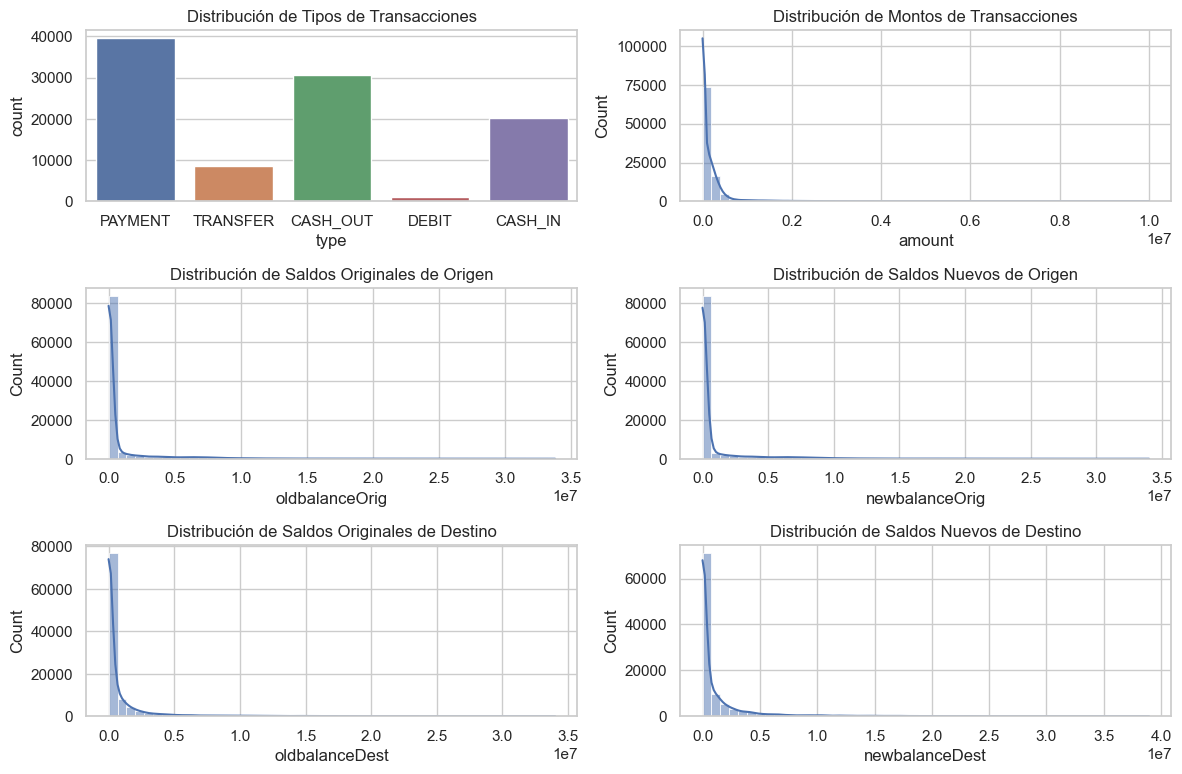

In [ ]:
# Configurar el tamaño del panel
plt.figure(figsize=(12, 10))

# Analizar variable 'type'
plt.subplot(4, 2, 1)
sns.countplot(data=df_fraud_detection, x='type')
plt.title('Distribución de Tipos de Transacciones')

# Analizar variable 'amount'
plt.subplot(4, 2, 2)
sns.histplot(df_fraud_detection['amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacciones')

# Analizar variable 'oldbalanceOrig'
plt.subplot(4, 2, 3)
sns.histplot(df_fraud_detection['oldbalanceOrig'], bins=50, kde=True)
plt.title('Distribución de Saldos Originales de Origen')

# Analizar variable 'newbalanceOrig'
plt.subplot(4, 2, 4)
sns.histplot(df_fraud_detection['newbalanceOrig'], bins=50, kde=True)
plt.title('Distribución de Saldos Nuevos de Origen')

# Analizar variable 'oldbalanceDest'
plt.subplot(4, 2, 5)
sns.histplot(df_fraud_detection['oldbalanceDest'], bins=50, kde=True)
plt.title('Distribución de Saldos Originales de Destino')

# Analizar variable 'newbalanceDest'
plt.subplot(4, 2, 6)
sns.histplot(df_fraud_detection['newbalanceDest'], bins=50, kde=True)
plt.title('Distribución de Saldos Nuevos de Destino')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* **Distribución Sesgada de Variables Numéricas:** Las variables numéricas (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) están altamente sesgadas hacia la izquierda. Esto sugiere que la mayoría de las transacciones involucran montos pequeños y balances bajos.

* **Tipo de Transacción (type):** El tipo de transacción (PAYMENT, TRANSFER, CASH_OUT, etc.) es una variable categórica que podría ser muy indicativa del fraude. Por ejemplo, ciertos tipos de transacciones podrían ser más susceptibles a fraudes.

Ingeniería de características:

* **Diferencias de Saldos:** Las diferencias entre los balances antes y después de la transacción tanto para el origen como para el destino pueden proporcionar pistas valiosas. Las transacciones fraudulentas podrían mostrar patrones anormales en estos cambios de saldo.

**Creando nuevas características**

In [ ]:
# Diferencias de Saldo ~ creando nuevas características
df_fraud_detection['diff_balance_orig'] = df_fraud_detection['oldbalanceOrig'] - df_fraud_detection['newbalanceOrig']
df_fraud_detection['diff_balance_dest'] = df_fraud_detection['oldbalanceDest'] - df_fraud_detection['newbalanceDest']

df_fraud_detection['ratio_balance_orig'] = df_fraud_detection['newbalanceOrig'] / (df_fraud_detection['oldbalanceOrig'] + 1)  # Evita división por cero
df_fraud_detection['ratio_balance_dest'] = df_fraud_detection['newbalanceDest'] / (df_fraud_detection['oldbalanceDest'] + 1)

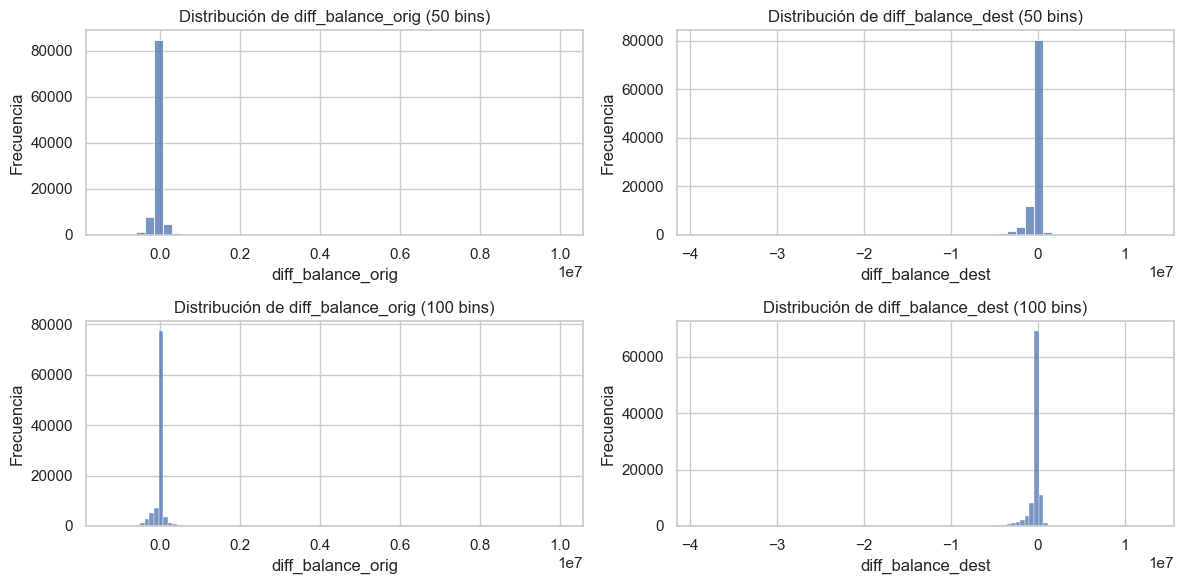

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subplots en una parrilla 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Utilizar una muestra del dataset para pruebas
# sample_data = df_fraud_detection.sample(frac=1, random_state=1)

# Primer gráfico de distribución para diff_balance_orig con 50 bins
sns.histplot(df_fraud_detection['diff_balance_orig'], kde=False, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribución de diff_balance_orig (50 bins)')
axes[0, 0].set_xlabel('diff_balance_orig')
axes[0, 0].set_ylabel('Frecuencia')

# Primer gráfico de distribución para diff_balance_dest con 50 bins
sns.histplot(df_fraud_detection['diff_balance_dest'], kde=False, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribución de diff_balance_dest (50 bins)')
axes[0, 1].set_xlabel('diff_balance_dest')
axes[0, 1].set_ylabel('Frecuencia')

# Segundo gráfico de distribución para diff_balance_orig con 100 bins
sns.histplot(df_fraud_detection['diff_balance_orig'], kde=False, ax=axes[1, 0], bins=100)
axes[1, 0].set_title('Distribución de diff_balance_orig (100 bins)')
axes[1, 0].set_xlabel('diff_balance_orig')
axes[1, 0].set_ylabel('Frecuencia')

# Segundo gráfico de distribución para diff_balance_dest con 100 bins
sns.histplot(df_fraud_detection['diff_balance_dest'], kde=False, ax=axes[1, 1], bins=100)
axes[1, 1].set_title('Distribución de diff_balance_dest (100 bins)')
axes[1, 1].set_xlabel('diff_balance_dest')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* **Concentración alrededor de 0**: La alta concentración de datos cerca de 0 en ambas métricas indica que la mayoría de las transacciones no afectan significativamente los balances de las cuentas, lo cual es típico en transacciones legítimas.
  
* **Valores extremos**: Los valores extremos, tanto positivos como negativos, pueden ser indicativos de transacciones sospechosas o fraudulentas. Estos valores extremos son importantes para analizar casos específicos de fraude.
  
* **Análisis adicional**: Para un análisis más profundo, podrías investigar las transacciones que caen en los extremos de las distribuciones para ver si hay patrones comunes que puedan indicar fraude.

In [ ]:
# imputamos "Unknown" a NaN
df_fraud_detection.fillna("Unknown", inplace=True)

print("Valores nulos antes de la limpieza:\n\n", df_fraud_detection.isnull().sum())

Valores nulos antes de la limpieza:

 type                  0
amount                0
Orig                  0
oldbalanceOrig        0
newbalanceOrig        0
Dest                  0
oldbalanceDest        0
newbalanceDest        0
isFraud               0
diff_balance_orig     0
diff_balance_dest     0
ratio_balance_orig    0
ratio_balance_dest    0
dtype: int64


In [ ]:
# One-Hot Encoding
# Convertir variables categóricas a variables numéricas usando One-Hot Encoding
# df_fraud_detection_encoded = pd.get_dummies(df_fraud_detection, columns=['type'])

In [ ]:
# Guardar los DataFrames en archivos CSV sin perder los índices 
df_fraud_detection.to_csv('data/clean/df_fraud_detection.csv', index=True)
print("df_fraud_detection.csv guardadado correctamente")

df_fraud_detection_ = pd.read_csv('data/clean/df_fraud_detection.csv', index_col=0)
print("df_fraud_detection.csv cargado correctamente")

df_fraud_detection.csv guardadado correctamente
df_fraud_detection.csv cargado correctamente


In [ ]:
print(df_fraud_detection_.shape)
df_fraud_detection_.head(10)

(100000, 13)


,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud,diff_balance_orig,diff_balance_dest,ratio_balance_orig,ratio_balance_dest
0,PAYMENT,9839.64,C4241584,170136.00,160296.36,C7814776,0.0,0.00,0,9839.64,0.00,0.942160,0.000000
1,PAYMENT,1864.28,C7332525,21249.00,19384.72,C7821866,0.0,0.00,0,1864.28,0.00,0.912222,0.000000
2,TRANSFER,181.00,Unknown,181.00,0.00,C5821867,0.0,0.00,1,181.00,0.00,0.000000,0.000000
3,CASH_OUT,181.00,C8442079,181.00,0.00,C8831669,21182.0,0.00,1,181.00,21182.00,0.000000,0.000000
4,PAYMENT,11668.14,C3359562,41554.00,29885.86,Unknown,0.0,0.00,0,11668.14,0.00,0.719188,0.000000
5,PAYMENT,7817.71,Unknown,53860.00,46042.29,C1228579,0.0,0.00,0,7817.71,0.00,0.854835,0.000000
6,PAYMENT,7107.77,C3227487,183195.00,176087.23,Unknown,0.0,0.00,0,7107.77,0.00,0.961196,0.000000
7,PAYMENT,7861.64,C2629684,176087.23,168225.59,Unknown,0.0,0.00,0,7861.64,0.00,0.955348,0.000000
8,PAYMENT,4024.36,C8825928,2671.00,0.00,C6317050,0.0,0.00,0,2671.00,0.00,0.000000,0.000000
9,DEBIT,5337.77,C4022090,41720.00,36382.23,C8712240,41898.0,40348.79,0,5337.77,1549.21,0.872036,0.963001




### df_credit_risk
---

> 
> <br>
>
> Variables Explicativas (Features)
>
>* **Job**: Tipo de empleo del cliente.
>* **Housing**: Tipo de vivienda (propia, alquilada, etc.).
>* **Credit amount**: Monto del crédito solicitado.
>* **Duration**: Duración del crédito.
>* **Purpose**: Propósito del crédito.
>* **Risk**: Riesgo asignado (bueno, malo).
>
>
> Variables Objetivo (Targets)
>
>* **Risk**: Clasificación de riesgo del crédito (bueno, malo).
>
> <br>
> 
---

In [ ]:
df_credit_risk = credit_risk.copy()

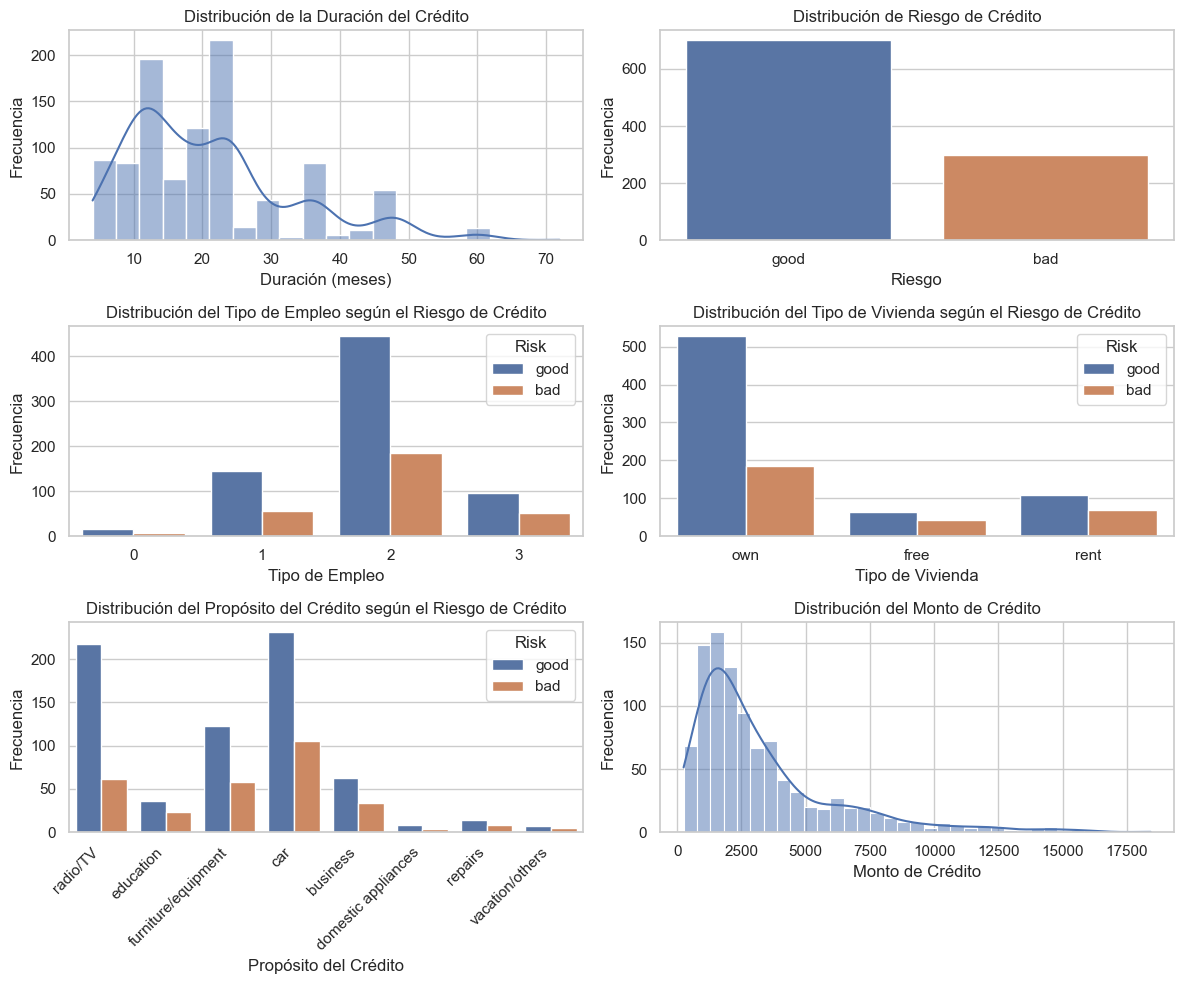

In [ ]:


# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subplots en una parrilla 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Gráfico de la variable Duration
sns.histplot(df_credit_risk['Duration'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Duración del Crédito')
axes[0, 0].set_xlabel('Duración (meses)')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de la variable Risk
sns.countplot(data=df_credit_risk, x='Risk', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Riesgo de Crédito')
axes[0, 1].set_xlabel('Riesgo')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico de la variable Job
sns.countplot(x='Job', hue='Risk', data=df_credit_risk, ax=axes[1, 0])
axes[1, 0].set_title('Distribución del Tipo de Empleo según el Riesgo de Crédito')
axes[1, 0].set_xlabel('Tipo de Empleo')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico de la variable Housing
sns.countplot(x='Housing', hue='Risk', data=df_credit_risk, ax=axes[1, 1])
axes[1, 1].set_title('Distribución del Tipo de Vivienda según el Riesgo de Crédito')
axes[1, 1].set_xlabel('Tipo de Vivienda')
axes[1, 1].set_ylabel('Frecuencia')

# Gráfico de la variable Purpose
sns.countplot(x='Purpose', hue='Risk', data=df_credit_risk, ax=axes[2, 0])
axes[2, 0].set_title('Distribución del Propósito del Crédito según el Riesgo de Crédito')
axes[2, 0].set_xlabel('Propósito del Crédito')
axes[2, 0].set_ylabel('Frecuencia')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha="right")

# Gráfico de la variable Credit amount
sns.histplot(df_credit_risk['Credit amount'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribución del Monto de Crédito')
axes[2, 1].set_xlabel('Monto de Crédito')
axes[2, 1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()





<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* <strong>Distribución del Monto de Crédito</strong>: La mayoría de los créditos tienen montos pequeños, lo cual puede influir en la predicción del riesgo crediticio. La distribución sesgada hacia montos más bajos sugiere que el modelo debe estar bien ajustado para manejar esta variabilidad y detectar patrones tanto en créditos pequeños como en los pocos créditos de montos altos.
  
* <strong>Distribución de la Duración del Crédito</strong>: La concentración de créditos en duraciones cortas (10-24 meses) sugiere que el modelo debe ser capaz de distinguir entre diferentes comportamientos de pago a corto plazo. Las duraciones más largas, aunque menos frecuentes, pueden proporcionar información valiosa sobre los clientes con créditos de mayor plazo.
  
* <strong>Distribución de Riesgo de Crédito</strong>: La mayoría de los clientes tienen un buen riesgo de crédito, indicando un desequilibrio de clases en el dataset. Para construir un modelo robusto, se necesitarán técnicas como el sobremuestreo (SMOTE) o el submuestreo para manejar este desequilibrio y asegurar que el modelo no sea sesgado hacia la clase mayoritaria (buen riesgo).

In [ ]:
import plotly.express as px
import pandas as pd

# Supongamos que df_credit_risk es el dataframe original
# Eliminar la columna CustomerID
df_credit_risk_corr = df_credit_risk.drop('CustomerID', axis=1)

# Convertir variables categóricas en variables numéricas (dummy variables)
df_encoded = pd.get_dummies(df_credit_risk_corr, drop_first=True)

# Calcular la matriz de correlación
corr_matrix = df_encoded.corr().round(3)

# Crear un mapa de calor interactivo con Plotly
fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Mapa de Calor de Correlación de las Variables')

# Ajustar el tamaño de la figura
fig.update_layout(width=900,height=700,
    title={
        'text': "Mapa de Calor de Correlación de las Variables",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="",
    yaxis_title=""
)

# Mostrar la figura
fig.show()



<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* **Importancia de la Duración y el Monto del Crédito**: Duration y Credit amount parecen ser variables importantes para predecir el riesgo de crédito. La correlación negativa con Risk_good indica que estos factores deberían ser considerados en un modelo predictivo.

* **Influencia del Tipo de Vivienda**: Las variables Housing_own y Housing_rent están fuertemente correlacionadas entre sí, pero su relación directa con Risk_good no es significativa. Sin embargo, podrían ser útiles en combinación con otras variables en el modelo.

* **Propósito del Crédito**: Algunos propósitos del crédito, como Purpose_furniture/equipment, muestran una correlación negativa con Risk_good, lo que sugiere que podrían ser indicadores de mayor riesgo cuando se consideran junto con otras variables.

* **Preprocesamiento**: escalar las variables continuas y codificar las variables categóricas correctamente.
  
* **Evaluación de Modelos**: algoritmos que puedan manejar interacciones no lineales y combinaciones de variables, como Random Forest, Gradient Boosting, y redes neuronales.

In [ ]:
# Guardar los DataFrames en archivos CSV sin perder los índices 
df_credit_risk.to_csv('data/clean/df_credit_risk.csv', index=True)
print("df_credit_risk.csv guardadado correctamente")

df_credit_risk_ = pd.read_csv('data/clean/df_credit_risk.csv', index_col=0)
print("df_credit_risk.csv cargado correctamente")

df_credit_risk.csv guardadado correctamente
df_credit_risk.csv cargado correctamente


In [ ]:
print(df_credit_risk.shape)
df_credit_risk_.head(10)

(1000, 7)


,Job,Housing,Credit amount,Duration,Purpose,Risk,CustomerID
0,2,own,1169,6,radio/TV,good,C1938652
1,2,own,5951,48,radio/TV,bad,C8016323
2,1,own,2096,12,education,good,C5141487
3,2,free,7882,42,furniture/equipment,good,C7035854
4,2,free,4870,24,car,bad,C5442952
5,1,free,9055,36,education,good,C1024446
6,2,own,2835,24,furniture/equipment,good,C2327977
7,3,rent,6948,36,car,good,C4911959
8,1,own,3059,12,radio/TV,good,C2432468
9,3,own,5234,30,car,bad,C8021714


## Selección de Modelos de ML

**Modelos para Evaluación de Riesgo Crediticio (df_credit_risk):**

> <br>
>
>Modelos: 
>
>  * **Random Forest**: Buen desempeño con datos categóricos y numéricos, manejo de desbalance.
>  * **Gradient Boosting**: Precisión alta, útil para datos con características mixtas.
>       * Propósito: Identificar a los clientes con alto riesgo de morosidad para que el banco pueda tomar decisiones más informadas sobre la concesión de créditos.
>
>Datos: 
>* **Variables**: Job, Housing, Credit amount, Duration, Purpose
>* **Target**: Risk
>   * Salida Esperada: El modelo debe predecir si un cliente es de alto riesgo ('bad') o bajo riesgo ('good') de morosidad.  
>
>Variables a Eliminar:
>
>* **CustomerID**: Es un identificador único que no aporta valor predictivo.
>
>Variables a Transformar:
>
>* **Job**: Codificar como variables categóricas (one-hot encoding).
>* **Housing**: Codificar como variables categóricas (one-hot encoding).
>* **Purpose**: Codificar como variables categóricas (one-hot encoding).
>* **Risk**: Convertir a variable binaria (1 para "bad", 0 para "good").
>
> <br>
>

**Modelos para Detección de Fraude (df_fraud_detection):**

>
> <br>
> 
> Modelos: 
>* **Logistic Regression**: Baseline model, fácil de interpretar. 
>* **XGBoost**: Eficiencia y precisión en detección de anomalías.
>   * Propósito: Detectar transacciones fraudulentas con alta precisión, permitiendo al banco tomar medidas preventivas rápidas.
>
>Datos: 
>
>* **Variables**: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, type, diff_balance_orig, diff_balance_dest, ratio_balance_orig, ratio_balance_dest
>* **Target**: isFraud
>   * Salida Esperada: El modelo debe predecir si una transacción es fraudulenta (1) o no (0).
>
> Variables a Eliminar:
> >
>* **Orig** y **Dest**: Son identificadores únicos que no aportan valor predictivo directo.
>
>Variables a Transformar:
>
>* **type**: Codificar como variables categóricas (one-hot encoding).
>
> <br>
>

**Modelos para Análisis de Transacciones (df_transactions):**

>
> <br>
> 
>Modelos: 
>* **Linear Regression**: Para predicción del monto de transacción. 
>   * **Propósito**: Predecir el monto de las transacciones futuras basándose en las características demográficas y de comportamiento del cliente. 
>* **Decision Trees**: Para entender los factores que influyen en el monto de transacción.
>   * **Propósito**: Identificar y entender los factores clave que influyen en el monto de las transacciones. 
>
>Datos: 
>
>* **Variables**: CustomerBirth, CustomerGender, TransactionLocation, TransactionDate
>* **Target**: TransactionAmount (eur)
>   * La salida del modelo en producción, cuando el TransactionAmount (eur) es el objetivo (target), proporcionará predicciones del monto de transacciones futuras para cada cliente. Estas predicciones pueden ser utilizadas de diversas maneras para mejorar el sistema de evaluación de crédito y otros procesos bancarios. Aquí hay algunos ejemplos de cómo se puede utilizar esta información:
>       * Predicción del Monto de Transacción: El modelo predice el valor esperado de una transacción futura para un cliente dado. Estas predicciones pueden ser utilizadas para entender el comportamiento financiero esperado del cliente y ajustar las decisiones de crédito en consecuencia.
>       * Evaluación del Riesgo Crediticio: Predicciones de los montos de transacciones futuras. Estas predicciones se integran con otros modelos de riesgo crediticio para mejorar la precisión de la evaluación del riesgo. Por ejemplo, un cliente con montos de transacciones consistentemente altos puede ser considerado menos riesgoso.
>       * Detección de Comportamientos Anómalos: Desviaciones significativas entre los montos predichos y los montos reales de las transacciones. Las anomalías pueden indicar posibles fraudes o cambios en la situación financiera del cliente. Esto puede activar alertas automáticas para una revisión más detallada.
>       * Personalización de Ofertas de Crédito: Predicciones del monto de transacción que indican la capacidad de gasto del cliente. Permite al banco personalizar los límites de crédito y las condiciones de los préstamos para cada cliente, basándose en su capacidad de gasto prevista.
>       * Segmentación de Clientes:  Valores predichos del monto de transacciones. Los clientes pueden ser segmentados en grupos basados en su capacidad de gasto predicha, permitiendo estrategias de marketing más efectivas y personalizadas.
>
>Variables a Eliminar:
>
>* **TransactionID, CustomerID, EmitterID, ReceiverID**: Son identificadores únicos que no aportan valor predictivo directo.
>
>Variables a Transformar:  
>* **CustomerBirth**: Calcular la edad.  
>* **CustomerGender**: Codificar como variables categóricas (one-hot encoding).  
>* **TransactionLocation**: Codificar como variables categóricas (one-hot encoding).  
>* **TransactionDate**: Convertir a características de fecha (día de la semana, mes, etc.).  
>
> <br>
>



**Suficiencia de Instancias**
* df_credit_risk: 1000 instancias, suficiente para modelos de clasificación con validación adecuada.
* df_fraud_detection: 100,000 instancias, adecuado para detección de fraude.
* df_transactions: 417,870 instancias, suficiente para análisis y predicción de transacciones.

### División de datos en conjuntos de entrenamiento, validación y test

In [789]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import joblib



**df_credit_risk**

In [783]:
df_credit_risk.head()

,Job,Housing,Credit amount,Duration,Purpose,Risk,CustomerID
0,2,own,1169,6,radio/TV,good,C1938652
1,2,own,5951,48,radio/TV,bad,C8016323
2,1,own,2096,12,education,good,C5141487
3,2,free,7882,42,furniture/equipment,good,C7035854
4,2,free,4870,24,car,bad,C5442952


In [784]:
# Cargar los datos
df_credit_risk_ = df_credit_risk.copy()

# Eliminar CustomerID
df_credit_risk_.drop(columns=['CustomerID'], inplace=True)

# Convertir Risk a binario
df_credit_risk_['Risk'] = df_credit_risk_['Risk'].map({'bad': 1, 'good': 0})

# Codificar las variables categóricas
categorical_cols = ['Job', 'Housing', 'Purpose']
df_credit_risk_ = pd.get_dummies(df_credit_risk_, 
                                 columns=categorical_cols, 
                                 drop_first=True)

# Dividir en características y etiqueta
X_credit_risk_ = df_credit_risk_.drop(columns=['Risk'])
y_credit_risk_ = df_credit_risk_['Risk']

In [785]:

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train_credit_risk, X_temp_credit_risk, y_train_credit_risk, y_temp_credit_risk = train_test_split(X_credit_risk_, y_credit_risk_, test_size=0.3, random_state=42, stratify=y_credit_risk_)
X_val_credit_risk, X_test_credit_risk, y_val_credit_risk, y_test_credit_risk = train_test_split(X_temp_credit_risk, y_temp_credit_risk, test_size=0.5, random_state=42, stratify=y_temp_credit_risk)

print("Tamaño del conjunto de entrenamiento (credit_risk):", X_train_credit_risk.shape)
print("Tamaño del conjunto de validación (credit_risk):", X_val_credit_risk.shape)
print("Tamaño del conjunto de prueba (credit_risk):", X_test_credit_risk.shape)

Tamaño del conjunto de entrenamiento (credit_risk): (700, 14)
Tamaño del conjunto de validación (credit_risk): (150, 14)
Tamaño del conjunto de prueba (credit_risk): (150, 14)


In [787]:
# Guardar las variables y conjuntos de datos
joblib.dump(X_credit_risk_, 'data/trained/X_credit_risk.joblib')
joblib.dump(y_credit_risk_, 'data/trained/y_credit_risk.joblib')
joblib.dump(X_train_credit_risk, 'data/trained/X_train_credit_risk.joblib')
joblib.dump(X_val_credit_risk, 'data/trained/X_val_credit_risk.joblib')
joblib.dump(X_test_credit_risk, 'data/trained/X_test_credit_risk.joblib')
joblib.dump(y_train_credit_risk, 'data/trained/y_train_credit_risk.joblib')
joblib.dump(y_val_credit_risk, 'data/trained/y_val_credit_risk.joblib')
joblib.dump(y_test_credit_risk, 'data/trained/y_test_credit_risk.joblib')

['data/trained/y_test_credit_risk.joblib']

**df_fraud_detection**

In [ ]:
# Cargar los datos
df_fraud_detection_ = df_fraud_detection.copy()

# Eliminar columnas Orig y Dest
df_fraud_detection_.drop(columns=['Orig', 'Dest'], inplace=True)

# Codificar la variable categórica 'type'
df_fraud_detection_ = pd.get_dummies(df_fraud_detection_, columns=['type'], drop_first=True)

# Dividir en características y etiqueta
X_fraud_detection = df_fraud_detection_.drop(columns=['isFraud'])
y_fraud_detection = df_fraud_detection_['isFraud']

In [ ]:

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train_fraud_detection, X_temp_fraud_detection, y_train_fraud_detection, y_temp_fraud_detection = train_test_split(X_fraud_detection, y_fraud_detection, test_size=0.3, random_state=42, stratify=y_fraud_detection)
X_val_fraud_detection, X_test_fraud_detection, y_val_fraud_detection, y_test_fraud_detection = train_test_split(X_temp_fraud_detection, y_temp_fraud_detection, test_size=0.5, random_state=42, stratify=y_temp_fraud_detection)

print("Tamaño del conjunto de entrenamiento (fraud_detection):", X_train_fraud_detection.shape)
print("Tamaño del conjunto de validación (fraud_detection):", X_val_fraud_detection.shape)
print("Tamaño del conjunto de prueba (fraud_detection):", X_test_fraud_detection.shape)


Tamaño del conjunto de entrenamiento (fraud_detection): (70000, 13)
Tamaño del conjunto de validación (fraud_detection): (15000, 13)
Tamaño del conjunto de prueba (fraud_detection): (15000, 13)


In [795]:

# Guardar las variables y conjuntos de datos para df_fraud_detection
joblib.dump(X_fraud_detection, 'data/trained/X_fraud_detection.joblib')
joblib.dump(y_fraud_detection, 'data/trained/y_fraud_detection.joblib')
joblib.dump(X_train_fraud_detection, 'data/trained/X_train_fraud_detection.joblib')
joblib.dump(X_val_fraud_detection, 'data/trained/X_val_fraud_detection.joblib')
joblib.dump(X_test_fraud_detection, 'data/trained/X_test_fraud_detection.joblib')
joblib.dump(y_train_fraud_detection, 'data/trained/y_train_fraud_detection.joblib')
joblib.dump(y_val_fraud_detection, 'data/trained/y_val_fraud_detection.joblib')
joblib.dump(y_test_fraud_detection, 'data/trained/y_test_fraud_detection.joblib')

['data/trained/y_test_fraud_detection.joblib']

**df_transactions**

In [ ]:

# Cargar los datos
df_transactions_ = df_transactions.copy()

# Eliminar identificadores únicos
df_transactions_.drop(columns=['TransactionID', 'CustomerID', 'EmitterID', 'ReceiverID'], inplace=True)

# Codificar las variables categóricas sin eliminar ninguna categoría
categorical_cols = ['CustomerGender', 'TransactionLocation']
df_transactions_ = pd.get_dummies(df_transactions_, columns=categorical_cols, drop_first=False)

# Extraer características de la fecha de transacción
df_transactions_['TransactionDate'] = pd.to_datetime(df_transactions_['TransactionDate'])
df_transactions_['TransactionDayOfWeek'] = df_transactions_['TransactionDate'].dt.dayofweek
df_transactions_['TransactionMonth'] = df_transactions_['TransactionDate'].dt.month
df_transactions_['TransactionDay'] = df_transactions_['TransactionDate'].dt.day
df_transactions_.drop(columns=['TransactionDate'], inplace=True)

# Extraer características de CustomerBirth
df_transactions_['CustomerBirth'] = pd.to_datetime(df_transactions_['CustomerBirth'])
df_transactions_['CustomerBirthYear'] = df_transactions_['CustomerBirth'].dt.year
df_transactions_['CustomerAge'] = df_transactions_['CustomerAge'].astype(float)  # Asegurar que CustomerAge sea numérico

# Eliminar la columna original de CustomerBirth si ya no es necesaria
df_transactions_.drop(columns=['CustomerBirth'], inplace=True)

# Dividir en características y etiqueta
X_transactions = df_transactions_.drop(columns=['TransactionAmount (eur)'])
y_transactions = df_transactions_['TransactionAmount (eur)']


# Paso 2: Normalizar los datos
scaler = StandardScaler()
X_transactions_scaled = scaler.fit_transform(X_transactions)

In [756]:

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train_transactions, X_temp_transactions, y_train_transactions, y_temp_transactions = train_test_split(X_transactions_scaled, y_transactions, test_size=0.3, random_state=42)
X_val_transactions, X_test_transactions, y_val_transactions, y_test_transactions = train_test_split(X_temp_transactions, y_temp_transactions, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento (transactions):", X_train_transactions.shape)
print("Tamaño del conjunto de validación (transactions):", X_val_transactions.shape)
print("Tamaño del conjunto de prueba (transactions):", X_test_transactions.shape)

Tamaño del conjunto de entrenamiento (transactions): (550348, 382)
Tamaño del conjunto de validación (transactions): (117932, 382)
Tamaño del conjunto de prueba (transactions): (117932, 382)


Guardar los DataFrames en archivos CSV en "data/training/" sin perder los índices

In [759]:

# Lista de modelos para df_credit_risk
models_credit_risk = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Lista de modelos para df_fraud_detection
models_fraud_detection = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Lista de modelos para df_transactions (aunque el objetivo de predicción es diferente)
# para simplificación, usaré clasificadores aquí, aunque normalmente usaríamos regresores.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

models_transactions = {
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}


In [760]:
def train_and_evaluate_classifier(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en los datos de validación
    y_pred = model.predict(X_val)
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
    
    # Mostrar la matriz de confusión y el reporte de clasificación
    print(f'Matriz de Confusión para {model_name}:\n{cm}')
    print(f'Reporte de Clasificación para {model_name}:\n{cr}')

    
def train_and_evaluate_regressor(model, X_train, y_train, X_val, y_val, model_name, cv=5):
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_scores_mean = -cv_scores.mean()
    cv_scores_std = cv_scores.std()
    
    print(f'Validación Cruzada para {model_name}:')
    print(f'CV Mean Squared Error: {cv_scores_mean}')
    print(f'CV Standard Deviation: {cv_scores_std}')
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en los datos de validación
    y_pred = model.predict(X_val)
    
    # Evaluar el modelo
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Resultados para {model_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Imprimir los valores predichos vs valores verdaderos
    print("Valores Verdaderos vs Predicciones:")
    for true, pred in zip(y_val[:10], y_pred[:10]):  # Muestra los primeros 10 para simplicidad
        print(f'Verdadero: {true}, Predicción: {pred}')



In [ ]:

# entrenamiento para credit_risk
for model_name, model in models_credit_risk.items():
    print(f'Entrenando y evaluando modelo: {model_name}')
    train_and_evaluate_classifier(model, X_train_credit_risk, y_train_credit_risk, X_val_credit_risk, y_val_credit_risk, model_name)


Entrenando y evaluando modelo: RandomForest
Matriz de Confusión para RandomForest:
[[89 16]
 [31 14]]
Reporte de Clasificación para RandomForest:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.47      0.31      0.37        45

    accuracy                           0.69       150
   macro avg       0.60      0.58      0.58       150
weighted avg       0.66      0.69      0.67       150

Entrenando y evaluando modelo: GradientBoosting
Matriz de Confusión para GradientBoosting:
[[93 12]
 [27 18]]
Reporte de Clasificación para GradientBoosting:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       105
           1       0.60      0.40      0.48        45

    accuracy                           0.74       150
   macro avg       0.69      0.64      0.65       150
weighted avg       0.72      0.74      0.72       150



<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* El modelo **GradientBoosting** muestra un mejor desempeño general en la clasificación del riesgo de crédito, especialmente en la identificación de la clase de alto riesgo. Por lo tanto, es preferible utilizar GradientBoosting para este problema de clasificación.
  
* Se podrían explorar más técnicas de balanceo de datos (como **sobremuestreo de la clase minoritaria** o **submuestreo de la clase mayoritaria**) para mejorar el recall de la clase 1.
  
* También podría ser útil **ajustar los hiperparámetros** de los modelos para mejorar aún más el desempeño.

In [ ]:
# entrenamiento para fraud_detection
for model_name, model in models_fraud_detection.items():
    print(f'Entrenando y evaluando modelo: {model_name}')
    train_and_evaluate_classifier(model, X_train_fraud_detection, y_train_fraud_detection, X_val_fraud_detection, y_val_fraud_detection, model_name)

Entrenando y evaluando modelo: LogisticRegression
Matriz de Confusión para LogisticRegression:
[[14981     1]
 [   15     3]]
Reporte de Clasificación para LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14982
           1       0.75      0.17      0.27        18

    accuracy                           1.00     15000
   macro avg       0.87      0.58      0.64     15000
weighted avg       1.00      1.00      1.00     15000

Entrenando y evaluando modelo: XGBoost
Matriz de Confusión para XGBoost:
[[14982     0]
 [    8    10]]
Reporte de Clasificación para XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14982
           1       1.00      0.56      0.71        18

    accuracy                           1.00     15000
   macro avg       1.00      0.78      0.86     15000
weighted avg       1.00      1.00      1.00     15000



<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* El modelo **XGBoost** muestra un mejor desempeño general en la detección de fraudes, especialmente en la identificación de la clase de fraude. Por lo tanto, es preferible utilizar XGBoost para este problema de detección de fraude.
* Se podrían explorar técnicas adicionales de balanceo de datos, como el **sobremuestreo de la clase minoritaria (fraude)** o el **submuestreo de la clase mayoritaria (no fraude)**, para mejorar aún más el desempeño de los modelos.
* Además, **ajustar los hiperparámetros** del modelo XGBoost podría llevar a mejoras adicionales en el desempeño de la detección de fraudes.

In [761]:

for model_name, model in models_transactions.items():
    print(f'Entrenando y evaluando modelo: {model_name}')
    train_and_evaluate_regressor(model, X_train_transactions, y_train_transactions, X_val_transactions, y_val_transactions, model_name)


Entrenando y evaluando modelo: DecisionTreeRegressor
Validación Cruzada para DecisionTreeRegressor:
CV Mean Squared Error: 694394.666933323
CV Standard Deviation: 4251.163777111343
Resultados para DecisionTreeRegressor:
Mean Squared Error: 690965.7045917902
R-squared: -0.8364276858694855
Valores Verdaderos vs Predicciones:
Verdadero: -870.0, Predicción: 50.0
Verdadero: 4.0, Predicción: 762.0
Verdadero: -749.0, Predicción: 766.0
Verdadero: -253.0, Predicción: 495.0
Verdadero: -1386.88, Predicción: 50.0
Verdadero: -160.0, Predicción: 500.0
Verdadero: -200.0, Predicción: 500.0
Verdadero: 999.0, Predicción: -50.0
Verdadero: 159.0, Predicción: 124.0
Verdadero: 799.9, Predicción: 1452.0
Entrenando y evaluando modelo: LinearRegression
Validación Cruzada para LinearRegression:
CV Mean Squared Error: 375701.9794162407
CV Standard Deviation: 279.75668405836745
Resultados para LinearRegression:
Mean Squared Error: 375316.91198969836
R-squared: 0.002494098371908837
Valores Verdaderos vs Prediccion

KeyboardInterrupt: 

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

Los resultados no son satisfactorios. 
* De los dos modelso entrenados, ambos modelos muestran resultados insatisfactorios, con altos valores de MSE y R² muy bajos, indicando que no están capturando bien la relación entre las características y la variable objetivo.
* Distribución de Datos: **La validación cruzada parece estar correctamente implementada**, ya que la desviación estándar de los errores es baja. Sin embargo, los malos resultados del modelo pueden deberse a otras razones, como la necesidad de mejor feature engineering o elección de modelos más adecuados.

Para entrenar los modelos de GradientBoostingRegressor, LinearRegression o DecisionTreeRegressor, se han realizado los siguientes procesos en los datos: 
* Imputación de valores faltantes, 
* Escalado de características, 
* Igeniería de características como la interacción entre variables o las tranformaciones de variables temporales.
* Limpieza de datos.

Enfoques Alternativos y Técnicas Avanzadas

* Modelos Basados en Redes Neuronales: 
  * Redes Neuronales Profundas (DNN): Especialmente útiles si tienes una gran cantidad de datos y pueden capturar relaciones complejas entre las variables.
  * Redes Neuronales Recurrentes (RNN) o LSTM: Si los datos temporales son importantes, estas redes pueden capturar dependencias a largo plazo en los datos secuenciales.
* Ensamble de Modelos: Combinar los resultados de múltiples modelos (por ejemplo, Linear Regression, Decision Trees, Random Forest, Gradient Boosting) para mejorar la robustez y precisión de las predicciones.
* Técnicas de Regularización


**DECISIÓN:**   
El compromiso de este trabajo es presentar un **producto mínimo viable**. El costoso calculo computacional para estos modelos hace que en cada entrenamiento gastemos horas para tener alguna respuesta. Es por este motivo que entregaremos nuestro **MPV** utilzando los dos algoritmos ya entrenados de forma satisfactoria. En la siguiente iteración profundizaremos en las mejoras de este modelo.

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**OBJETIVOS**

Detectar transacciones fraudulentas con alta precisión, permitiendo al banco tomar medidas preventivas rápidas.
* **XGBoost**: Eficiencia y precisión en detección de anomalías.   
  
Identificar a los clientes con alto riesgo de morosidad para que el banco pueda tomar decisiones más informadas sobre la concesión de créditos.
* **Gradient Boosting**: Precisión alta, útil para datos con características mixtas.

**Otra prueba de modelos**

In [774]:
def train_and_evaluate_classifier(model, X_train, y_train, X_val, y_val, model_name, save_path):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Guardar el modelo entrenado
    joblib.dump(model, f'{save_path}/{model_name}.joblib')
    
    # Predecir en los datos de validación
    y_pred = model.predict(X_val)
    
    # Predecir las probabilidades para la clase positiva
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc = roc_auc_score(y_val, y_prob)
    
    # Mostrar la matriz de confusión y el reporte de clasificación
    print(f'Matriz de Confusión para {model_name}:\n{cm}')
    print(f'Reporte de Clasificación para {model_name}:\n{cr}')
    
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()



Entrenando y evaluando modelo: RandomForest
Matriz de Confusión para RandomForest:
[[89 16]
 [31 14]]
Reporte de Clasificación para RandomForest:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.47      0.31      0.37        45

    accuracy                           0.69       150
   macro avg       0.60      0.58      0.58       150
weighted avg       0.66      0.69      0.67       150



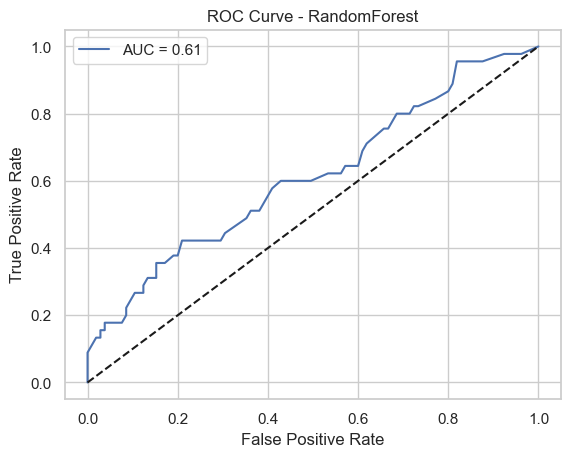

Entrenando y evaluando modelo: GradientBoosting
Matriz de Confusión para GradientBoosting:
[[93 12]
 [27 18]]
Reporte de Clasificación para GradientBoosting:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       105
           1       0.60      0.40      0.48        45

    accuracy                           0.74       150
   macro avg       0.69      0.64      0.65       150
weighted avg       0.72      0.74      0.72       150



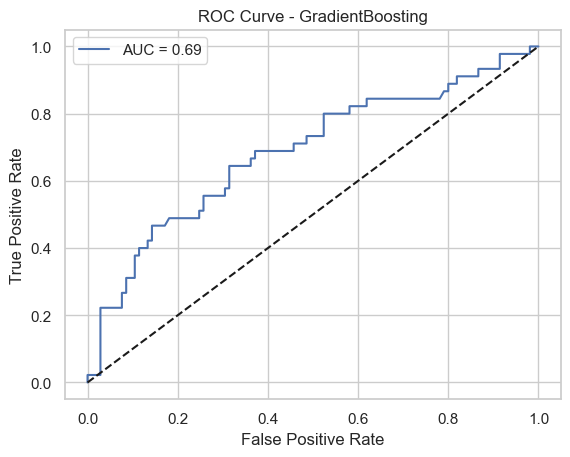

Entrenando y evaluando modelo: LogisticRegression
Matriz de Confusión para LogisticRegression:
[[14981     1]
 [   15     3]]
Reporte de Clasificación para LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14982
           1       0.75      0.17      0.27        18

    accuracy                           1.00     15000
   macro avg       0.87      0.58      0.64     15000
weighted avg       1.00      1.00      1.00     15000



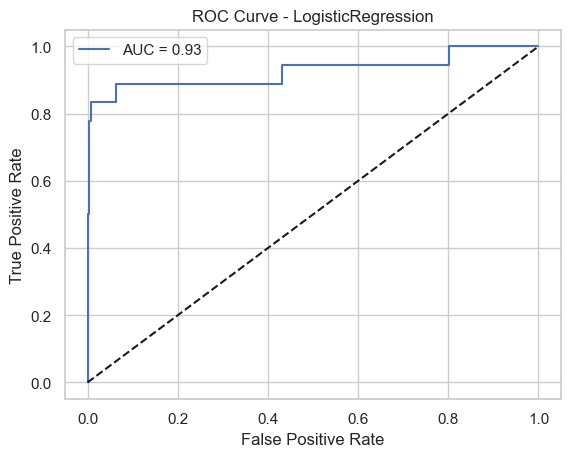

Entrenando y evaluando modelo: XGBoost
Matriz de Confusión para XGBoost:
[[14982     0]
 [    8    10]]
Reporte de Clasificación para XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14982
           1       1.00      0.56      0.71        18

    accuracy                           1.00     15000
   macro avg       1.00      0.78      0.86     15000
weighted avg       1.00      1.00      1.00     15000



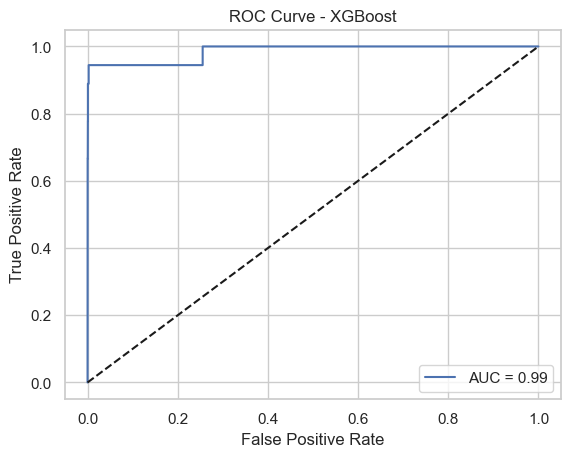

In [775]:
# para guardar los modelos
save_path = 'data/models/'

# Entrenamiento para credit_risk
for model_name, model in models_credit_risk.items():
    print(f'Entrenando y evaluando modelo: {model_name}')
    train_and_evaluate_classifier(model, X_train_credit_risk, y_train_credit_risk, X_val_credit_risk, y_val_credit_risk, model_name, save_path)

# Entrenamiento para fraud_detection
for model_name, model in models_fraud_detection.items():
    print(f'Entrenando y evaluando modelo: {model_name}')
    train_and_evaluate_classifier(model, X_train_fraud_detection, y_train_fraud_detection, X_val_fraud_detection, y_val_fraud_detection, model_name, save_path)


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* Para la detección de fraude, me quedo **XGBoost** debido a su excelente rendimiento general y alta AUC.
* Para la evaluación de riesgo crediticio, me quedo con **Gradient Boosting** debido a su mejor desempeño comparativo en la detección de clientes de alto riesgo.

**Optimización del Modelo XGBoost para la Detección de Fraude**

Matriz de Confusión para Best_XGBoost_Fraud:
[[14981     1]
 [   11     7]]
Reporte de Clasificación para Best_XGBoost_Fraud:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14982
           1       0.88      0.39      0.54        18

    accuracy                           1.00     15000
   macro avg       0.94      0.69      0.77     15000
weighted avg       1.00      1.00      1.00     15000



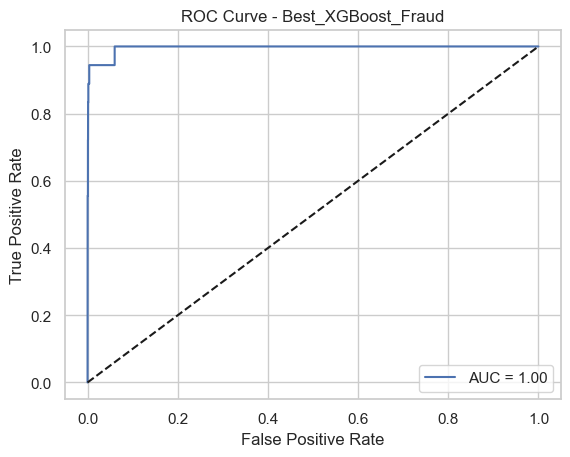

Best XGBoost parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [778]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import joblib

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Inicializar el modelo y RandomizedSearchCV
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)

# Realizar la búsqueda
random_search.fit(X_train_fraud_detection, y_train_fraud_detection)

# Obtener el mejor modelo
best_xgb_model = random_search.best_estimator_

# Evaluación del mejor modelo
train_and_evaluate_classifier(best_xgb_model, X_train_fraud_detection, y_train_fraud_detection, X_val_fraud_detection, y_val_fraud_detection, 'Best_XGBoost_Fraud', save_path)

print(f'Best XGBoost parameters: {random_search.best_params_}')


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Interpretación de Resultados**

AUC = 1.00: Un AUC perfecto sugiere que el modelo tiene una capacidad excelente para distinguir entre las clases de fraude y no fraude.

Precisión y Recall:

* La precisión para la clase 1 (fraude) es alta (0.88), lo que indica que cuando el modelo predice fraude, suele estar en lo correcto.
  
* El recall para la clase 1 (fraude) es moderado (0.39), lo que indica que el modelo no está capturando todos los casos de fraude. Esto es importante porque en aplicaciones de detección de fraude, el recall suele ser crucial para asegurarse de que se detecten la mayor cantidad posible de fraudes.

F1-score:

* El F1-score para la clase 1 (fraude) es 0.54, lo que muestra un balance entre precisión y recall, aunque hay margen para mejorar.
  
Consideraciones para Producción

* Alta Precisión pero Moderado Recall: Si la prioridad es minimizar los falsos negativos (es decir, no perder casos de fraude), el modelo puede necesitar ajustes adicionales. Sin embargo, si los falsos positivos (clasificar transacciones legítimas como fraude) son costosos, la alta precisión es beneficiosa.
  
* Sobremuestreo/Submuestreo: Considera técnicas de balanceo de clases como SMOTE (Synthetic Minority Over-sampling Technique) para mejorar el recall sin sacrificar demasiada precisión.

* Ajuste de Umbral de Decisión: Ajustar el umbral de decisión puede ayudar a encontrar un mejor equilibrio entre precisión y recall.


**Optimización del Modelo Gradient Boosting para la Evaluación de Riesgo Crediticio**

Matriz de Confusión para Best_GradientBoosting_CreditRisk:
[[101   4]
 [ 38   7]]
Reporte de Clasificación para Best_GradientBoosting_CreditRisk:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       105
           1       0.64      0.16      0.25        45

    accuracy                           0.72       150
   macro avg       0.68      0.56      0.54       150
weighted avg       0.70      0.72      0.65       150



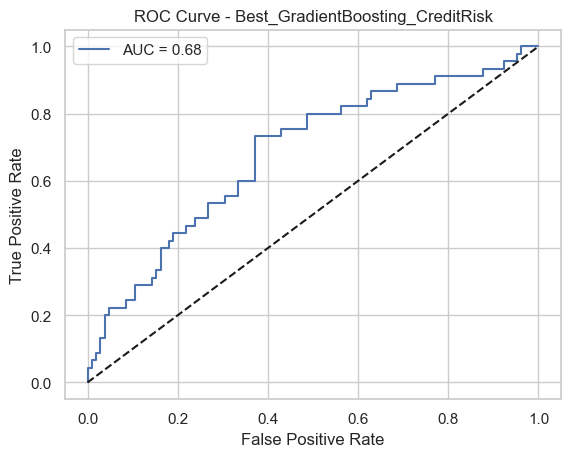

Best Gradient Boosting parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}


In [779]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Inicializar el modelo y RandomizedSearchCV
gb_model = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)

# Realizar la búsqueda
random_search.fit(X_train_credit_risk, y_train_credit_risk)

# Obtener el mejor modelo
best_gb_model = random_search.best_estimator_

# Evaluación del mejor modelo
train_and_evaluate_classifier(best_gb_model, X_train_credit_risk, y_train_credit_risk, X_val_credit_risk, y_val_credit_risk, 'Best_GradientBoosting_CreditRisk', save_path)

print(f'Best Gradient Boosting parameters: {random_search.best_params_}')



<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Interpretación de Resultados**

AUC = 0.68: Este valor indica un rendimiento moderado del modelo. El modelo tiene alguna capacidad para distinguir entre clientes de bajo y alto riesgo, pero no es excelente.

Precisión y Recall:

* La precisión para la clase 1 (alto riesgo) es 0.64, lo que significa que cuando el modelo predice alto riesgo, suele estar en lo correcto el 64% del tiempo.
  
* El recall para la clase 1 (alto riesgo) es muy bajo (0.16), lo que indica que el modelo está fallando en identificar muchos casos de alto riesgo.

F1-score:

* El F1-score para la clase 1 (alto riesgo) es 0.25, lo que muestra que hay un gran desequilibrio entre precisión y recall para esta clase.
 
Consideraciones para Producción

* Moderado AUC: Un AUC de 0.68 sugiere que hay espacio para mejorar el modelo antes de llevarlo a producción.
* Bajo Recall para Alto Riesgo: En la evaluación de riesgo crediticio, es crucial identificar correctamente los clientes de alto riesgo para prevenir pérdidas. El bajo recall (0.16) es una preocupación significativa.
* Balanceo de Clases: Considera técnicas de balanceo de clases como SMOTE (Synthetic Minority Over-sampling Technique) para mejorar el recall de la clase minoritaria (alto riesgo).


In [780]:

# Guardar el modelo XGBoost optimizado
joblib.dump(best_xgb_model, f'{save_path}/Best_XGBoost_Fraud.joblib')

# Guardar el modelo Gradient Boosting optimizado
joblib.dump(best_gb_model, f'{save_path}/Best_GradientBoosting_CreditRisk.joblib')

['data/models//Best_GradientBoosting_CreditRisk.joblib']

**MODELOS EN PRODUCCION**
---

In [805]:
# modelo de detección de fraude
xgboost_model = joblib.load(f'{save_path}/Best_XGBoost_Fraud.joblib')

# modelo de evaluación de riesgo crediticio
gradient_boosting_model = joblib.load(f'{save_path}/Best_GradientBoosting_CreditRisk.joblib')

# Cargar las variables y conjuntos de datos
X_credit_risk = joblib.load('data/trained/X_credit_risk.joblib')
y_credit_risk = joblib.load('data/trained/y_credit_risk.joblib')
X_train_credit_risk = joblib.load('data/trained/X_train_credit_risk.joblib')
X_val_credit_risk = joblib.load('data/trained/X_val_credit_risk.joblib')
X_test_credit_risk = joblib.load('data/trained/X_test_credit_risk.joblib')
y_train_credit_risk = joblib.load('data/trained/y_train_credit_risk.joblib')
y_val_credit_risk = joblib.load('data/trained/y_val_credit_risk.joblib')
y_test_credit_risk = joblib.load('data/trained/y_test_credit_risk.joblib')

In [790]:


def predict_and_evaluate(df, model, feature_cols, target_col, model_name):
    # Separar características y etiquetas
    X = df[feature_cols]
    y_true = df[target_col]
    
    # Realizar predicciones
    y_pred = model.predict(X)
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    
    # Crear un nuevo dataframe con las predicciones
    df_results = df.copy()
    df_results[f'Predicted_{target_col}'] = y_pred
    
    # Mostrar resultados
    print(f"Total {target_col}: {len(df)}")
    print(f"Correct {target_col} predictions: {sum(y_true == y_pred)}")
    print(f"Incorrect {target_col} predictions: {sum(y_true != y_pred)}")
    print(f"{target_col.capitalize()} Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    
    return df_results

**Evaluando riesgo de crédito**

In [794]:
# Definir las columnas de características
feature_cols_credit_risk = X_credit_risk.columns.tolist()
target_col_credit_risk = 'Risk'

# Combinar conjuntos de validación y prueba para evaluar todo el conjunto de datos no visto
X_eval_credit_risk = pd.concat([X_val_credit_risk, X_test_credit_risk])
y_eval_credit_risk = pd.concat([y_val_credit_risk, y_test_credit_risk])
df_eval_credit_risk = X_eval_credit_risk.copy()
df_eval_credit_risk[target_col_credit_risk] = y_eval_credit_risk

# Evaluar el modelo
df_results_credit_risk = predict_and_evaluate(df_eval_credit_risk, best_gb_model, feature_cols_credit_risk, target_col_credit_risk, 'Best_GradientBoosting_CreditRisk')

# Mostrar los primeros registros del dataframe resultante con las predicciones
df_results_credit_risk[['Credit amount','Duration', 'Risk', 'Predicted_Risk']].head(10)

Total Risk: 300
Correct Risk predictions: 217
Incorrect Risk predictions: 83
Risk Accuracy: 0.72

Confusion Matrix:
[[204   6]
 [ 77  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       210
           1       0.68      0.14      0.24        90

    accuracy                           0.72       300
   macro avg       0.71      0.56      0.53       300
weighted avg       0.71      0.72      0.65       300



,Credit amount,Duration,Risk,Predicted_Risk
309,276,9,0,0
404,2899,18,0,0
940,3527,12,0,0
832,11816,45,1,1
575,2788,15,0,0
30,1913,18,0,0
78,9436,54,0,0
870,7678,36,0,0
254,2030,9,0,0
844,3422,18,0,0


**Evaluando riesgo de fraude**

In [804]:
# Definir las columnas de características
feature_cols_fraud_detection = X_fraud_detection.columns.tolist()
target_col_fraud_detection = 'isFraud'

# Combinar conjuntos de validación y prueba para evaluar todo el conjunto de datos no visto
X_eval_fraud_detection = pd.concat([X_val_fraud_detection, X_test_fraud_detection])
y_eval_fraud_detection = pd.concat([y_val_fraud_detection, y_test_fraud_detection])
df_eval_fraud_detection = X_eval_fraud_detection.copy()
df_eval_fraud_detection[target_col_fraud_detection] = y_eval_fraud_detection

# Evaluar el modelo
df_results_fraud_detection = predict_and_evaluate(df_eval_fraud_detection, best_xgb_model, feature_cols_fraud_detection, target_col_fraud_detection, 'Best_XGBoost_FraudDetection')

# Mostrar los primeros registros del dataframe resultante con las predicciones
df_results_fraud_detection[['amount','oldbalanceOrig','newbalanceOrig','isFraud','Predicted_isFraud']].tail()


Total isFraud: 30000
Correct isFraud predictions: 29978
Incorrect isFraud predictions: 22
Isfraud Accuracy: 1.00

Confusion Matrix:
[[29963     2]
 [   20    15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29965
           1       0.88      0.43      0.58        35

    accuracy                           1.00     30000
   macro avg       0.94      0.71      0.79     30000
weighted avg       1.00      1.00      1.00     30000



,amount,oldbalanceOrig,newbalanceOrig,isFraud,Predicted_isFraud
82036,32003.19,0.00,0.00,0,0
54368,938551.17,41219.00,0.00,0,0
2790,208366.03,8271112.67,8479478.70,0,0
34623,4988.61,324340.80,319352.19,0,0
77645,77854.50,40402.00,0.00,0,0


In [803]:
# Filtrar y mostrar las filas con isFraud == 1
df_results_fraud_detection[df_results_fraud_detection['isFraud'] == 1][['amount', 'oldbalanceOrig', 'newbalanceOrig', 'isFraud', 'Predicted_isFraud']].head()


,amount,oldbalanceOrig,newbalanceOrig,isFraud,Predicted_isFraud
4775,86070.17,86070.17,0.0,1,1
18772,222.00,222.00,0.0,1,0
5558,33332.86,33332.86,0.0,1,1
56477,1154353.99,1154353.99,0.0,1,1
58308,21922.00,21922.00,0.0,1,0


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**CONCLUSIONES FINALES**

Durante el proyecto, evaluamos y optimizamos diversos modelos de aprendizaje automático para dos tareas críticas: la detección de fraude y la evaluación del riesgo crediticio. Utilizando un enfoque sistemático, seleccionamos los mejores modelos basados en sus métricas de desempeño, y propusimos estrategias para mejoras futuras.

**Detección de Fraude**: modelo selleccionado **XGBoost**.

  - **AUC**: 1.00 (excelente capacidad de discriminación).
  - **Precisión en la Clase de Fraude**: 0.88.
  - **Recall en la Clase de Fraude**: 0.39.
  - **F1-score en la Clase de Fraude**: 0.54.

- **Conclusión**: El modelo XGBoost ha mostrado un rendimiento excelente con un AUC perfecto. Sin embargo, el recall moderado indica que hay margen para mejorar en la identificación de fraudes.

- **Acciones Futuras**:
  - **Balanceo de Clases**: Implementar técnicas como SMOTE para mejorar el recall sin sacrificar la precisión.
  - **Ajuste de Umbral de Decisión**: Explorar diferentes umbrales para encontrar un mejor equilibrio entre precisión y recall.

**Evaluación del Riesgo Crediticio** : Modelo Seleccionado **Gradient Boosting**.

  - **AUC**: 0.68 (moderado).
  - **Precisión en la Clase de Alto Riesgo**: 0.64.
  - **Recall en la Clase de Alto Riesgo**: 0.16.
  - **F1-score en la Clase de Alto Riesgo**: 0.25.

- **Conclusión**: El modelo Gradient Boosting tiene un rendimiento moderado, con un bajo recall para la clase de alto riesgo. Esto implica que el modelo no está identificando eficazmente todos los clientes de alto riesgo, lo cual es crucial para prevenir pérdidas.

- **Acciones Futuras**:
  - **Balanceo de Clases**: Utilizar técnicas de sobremuestreo (como SMOTE) para mejorar la capacidad del modelo de identificar correctamente a los clientes de alto riesgo.
  - **Ajuste de Umbral de Decisión**: Ajustar el umbral de decisión para mejorar el recall en la detección de clientes de alto riesgo.
  - **Exploración de Nuevos Modelos**: Considerar otros algoritmos de clasificación y realizar más ajustes de hiperparámetros para mejorar el rendimiento general.

#### Próximos Pasos ~> versión 2.

Hemos logrado desarrollar y optimizar modelos sólidos para la detección de fraude y la evaluación del riesgo crediticio. Aunque los resultados actuales son prometedores, especialmente para la detección de fraude, hay espacio para mejoras significativas. Las acciones propuestas, como el balanceo de clases y el ajuste de umbrales, están diseñadas para abordar estas áreas y mejorar aún más el desempeño de los modelos en futuras iteraciones. Siguientes pasos:

1. **Implementación de Técnicas de Balanceo**: Aplicar SMOTE para balancear las clases en ambos problemas y reevaluar los modelos.
2. **Ajuste de Umbrales**: Experimentar con diferentes umbrales de decisión para mejorar el recall, especialmente en la evaluación de riesgo crediticio.
3. **Monitoreo Continuo**: Una vez en producción, monitorear continuamente el rendimiento de los modelos con datos nuevos para asegurarse de que sigan siendo efectivos y ajustarlos según sea necesario.

